# TP6 - Analyse de données sous `Python` - *application*

#### Analyse de Données Massives - Master 1ère année

In [25]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [3]:
pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)

In [4]:
pen = pen_tes.copy().append(pen_tra, ignore_index = True)
print(pen.shape)
pen.head()

(10992, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [5]:
pen.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [6]:
[x for x in range(1, 9) for i in range(2)]

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8]

In [7]:
["x", "y"] * 8

['x',
 'y',
 'x',
 'y',
 'x',
 'y',
 'x',
 'y',
 'x',
 'y',
 'x',
 'y',
 'x',
 'y',
 'x',
 'y']

In [8]:
[c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]

['x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8']

In [9]:
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
a

['x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'chiffre']

In [10]:
pen.columns = a
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [32]:
pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])

In [11]:
xN = ["x" + str(i + 1) for i in range(8)]
print(xN)
yN = ["y" + str(i + 1) for i in range(8)]
print(yN)
xyN = [a + b for a,b in zip(["x", "y"] * 8, [str(i + 1) for i in range(8) for j in range(2)])]
print(xyN)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8']
['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8']


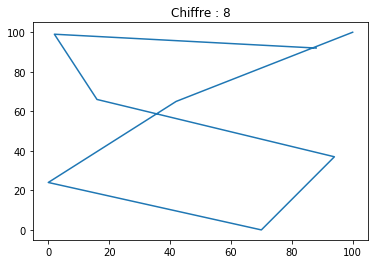

In [12]:
x = pen.loc[0, xN]
y = pen.loc[0, yN]
chiffre = pen.loc[0, "chiffre"]
plt.plot(x, y)
plt.title("Chiffre : " + str(chiffre))

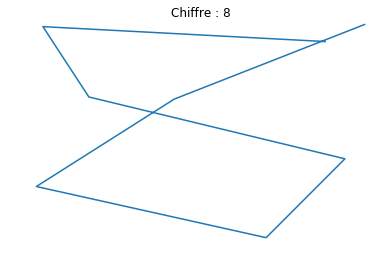

In [13]:
def dessin(p, x, y, chiffre):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(chiffre))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])

fig, ax = plt.subplots()
dessin(ax, x, y, chiffre)

In [14]:
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]
subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

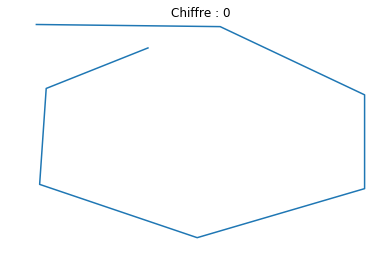

In [15]:
fig, ax = plt.subplots()
dessin(ax, subxyc[0][0], subxyc[0][1], subxyc[0][2])

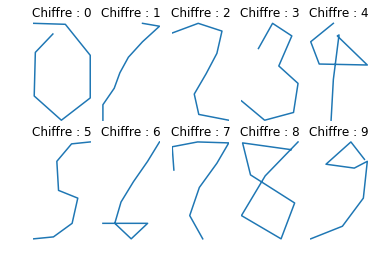

In [16]:
fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])
plt.show()

In [17]:
chmoy = [[s[0:15:2], s[1:16:2], int(s[16])] for s in [ss.mean() for ss in sub]]

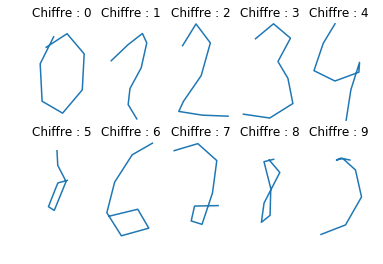

In [18]:
fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, chmoy[i][0], chmoy[i][1], chmoy[i][2])
plt.show()

## ACP

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [20]:
pen[xyN].head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0


In [76]:
pca = PCA(whiten=True)
pca.fit(scale(pen[xyN]))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [77]:
pca.explained_variance_ratio_


array([ 0.29478665,  0.20181951,  0.16105039,  0.07685886,  0.0664437 ,
        0.04983371,  0.03791573,  0.03426572,  0.02567651,  0.01863943,
        0.01315704,  0.00701856,  0.00503007,  0.00362513,  0.00214153,
        0.00173746])

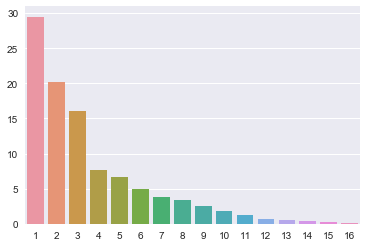

In [78]:
seaborn.barplot(x = [x + 1 for x in range(len(pca.explained_variance_ratio_))], 
                y = pca.explained_variance_ratio_ * 100)

In [79]:
pen_pca = pca.transform(pen[xyN])
pen_pca.shape

(10992, 16)

In [98]:
pen_pca_df = pandas.DataFrame().assign(Dim1 = pen_pca[:,0], Dim2 = pen_pca[:,1], chiffre = pen.chiffre_str)

In [81]:
pen_pca_df.shape

(10992, 17)

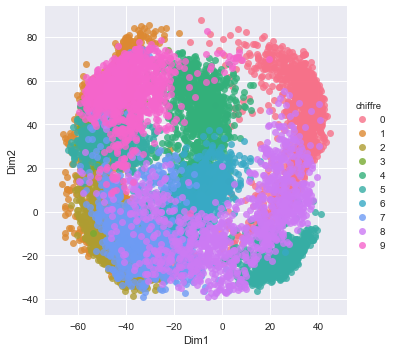

In [99]:
seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False)

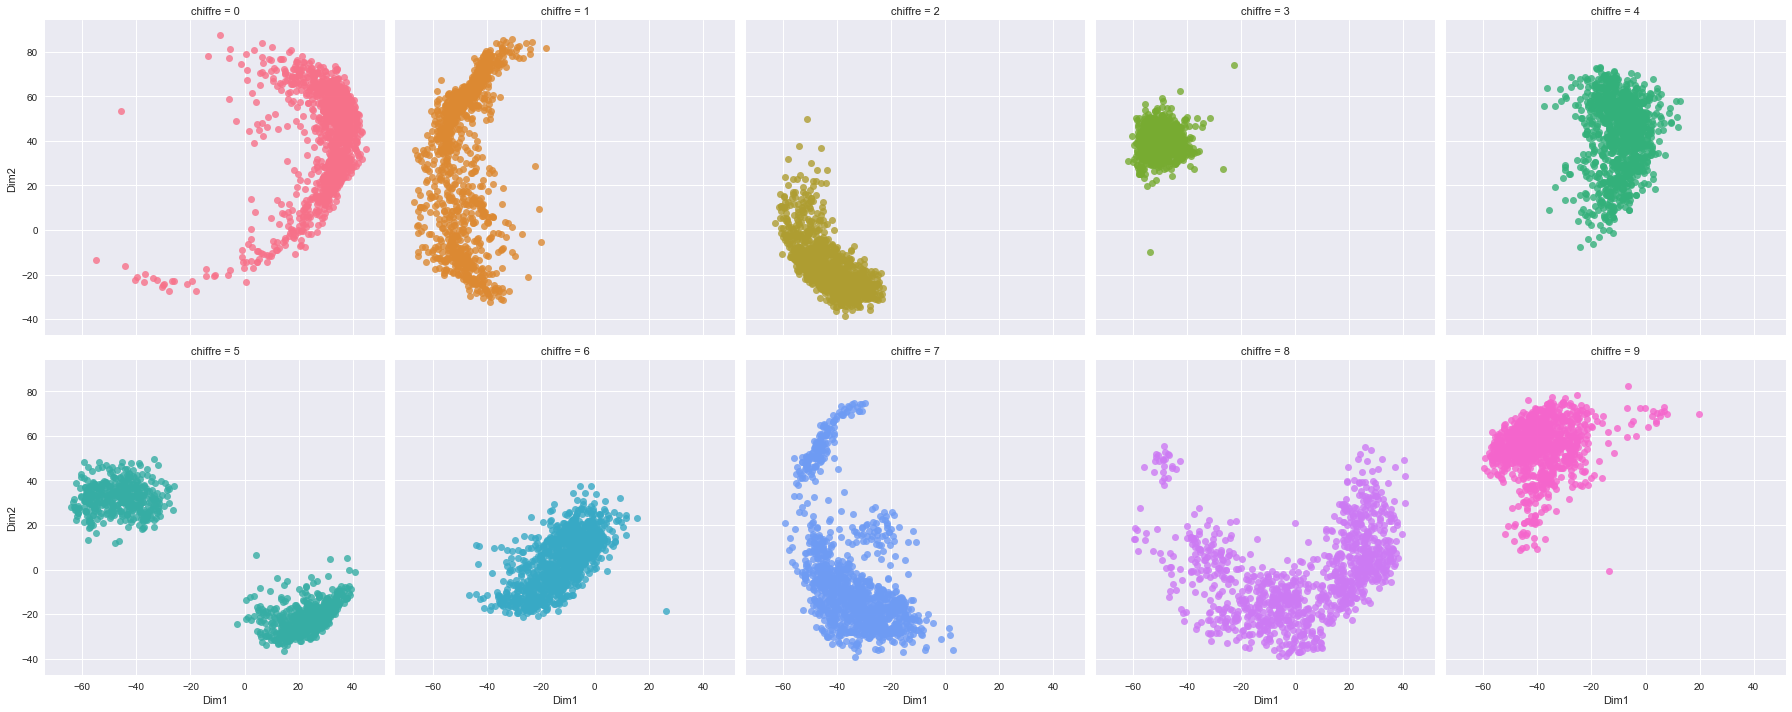

In [100]:
seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False, col = "chiffre", col_wrap = 5)

## DBSCAN

Mais **par chiffre**

In [186]:
pen_ch = [pen.query("chiffre == " + str(c)) for c in range(10)]
pca_ch = [pen_pca_df.query("chiffre == '" + str(c) + "'") for c in range(10)]

In [187]:
from sklearn.cluster import DBSCAN

pen_ch_db = [DBSCAN(eps = 40, min_samples = 5).fit(p[xyN]) for p in pen_ch]
pen_ch_db_labels = [db.labels_ for db in pen_ch_db]

pandas.DataFrame().assign(chiffre = range(10),
                          NbClasse = [max(lab) + 1 for lab in pen_ch_db_labels],
                          Outliers = [sum(lab == -1) for lab in pen_ch_db_labels])

,NbClasse,Outliers,chiffre
0,1,38,0
1,4,41,1
2,1,6,2
3,1,8,3
4,2,18,4
5,2,9,5
6,1,13,6
7,3,16,7
8,7,171,8
9,4,83,9


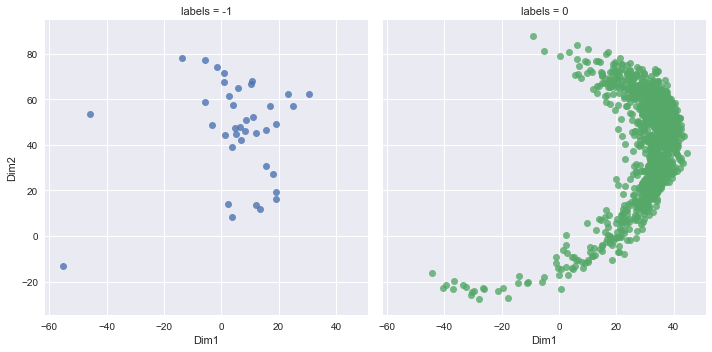

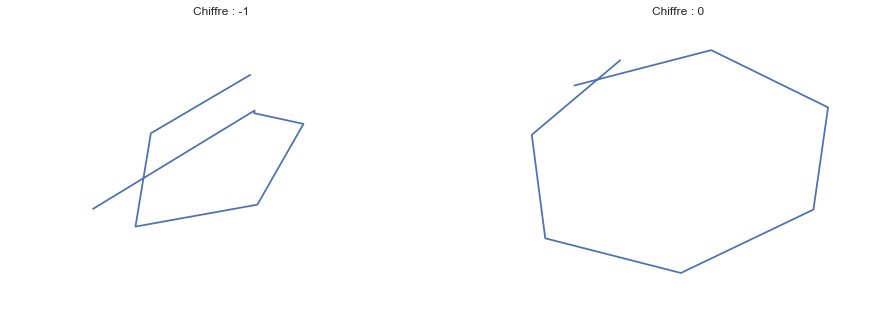

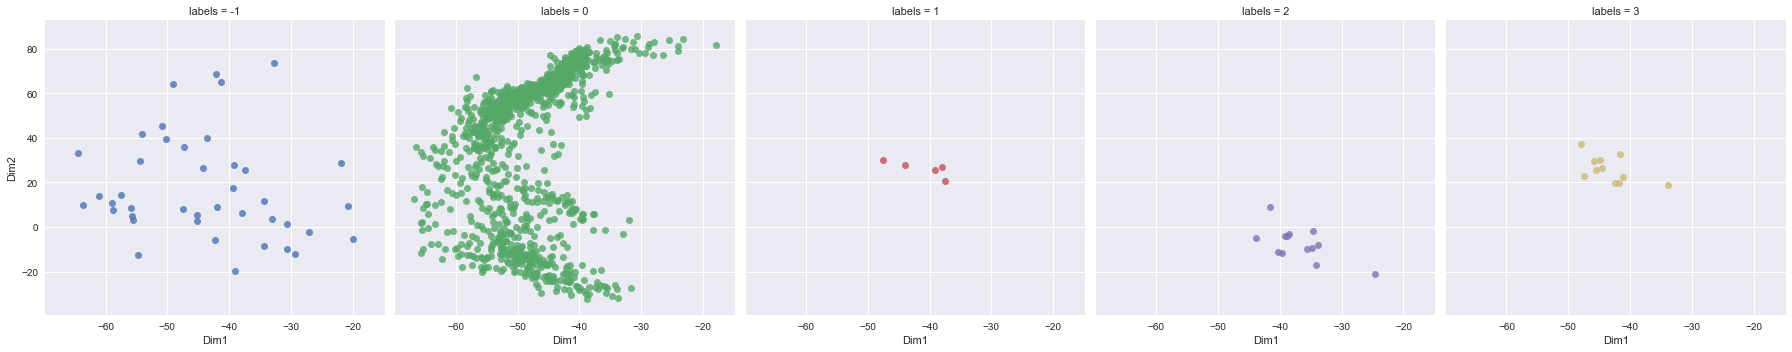

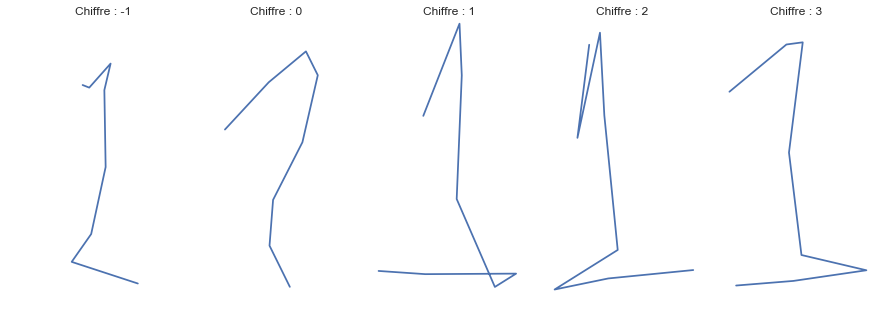

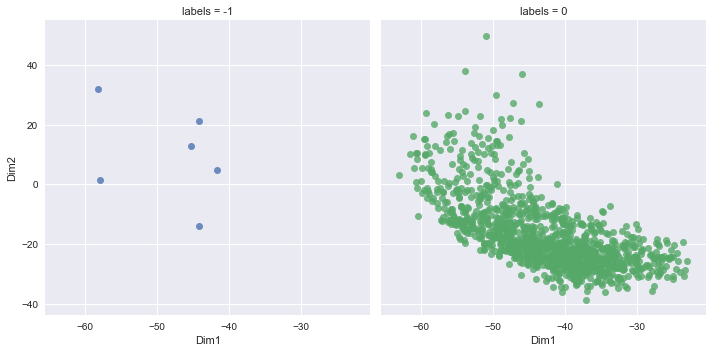

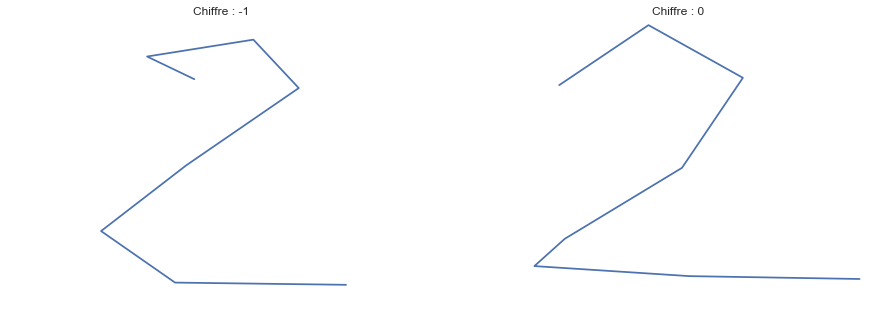

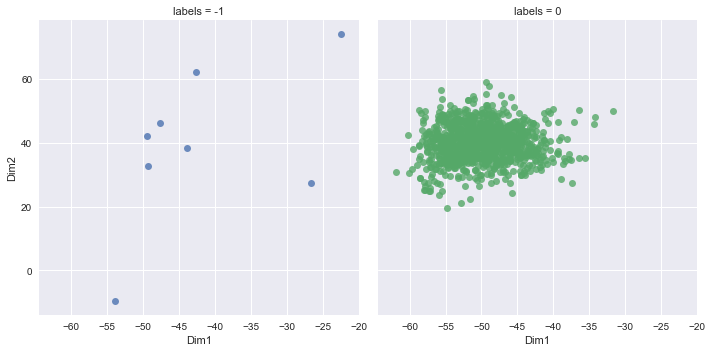

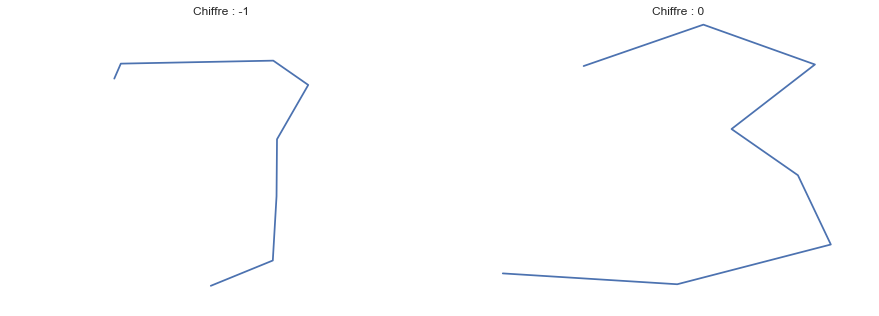

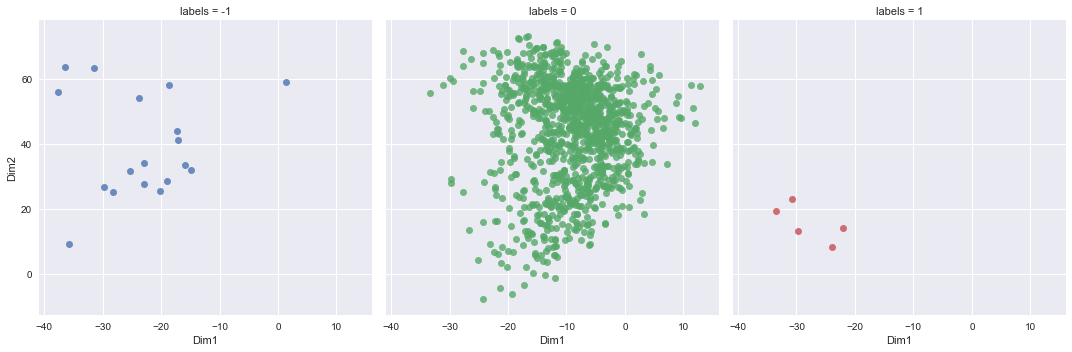

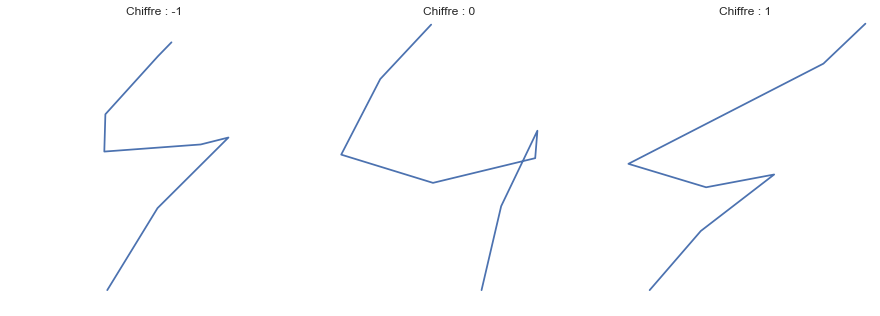

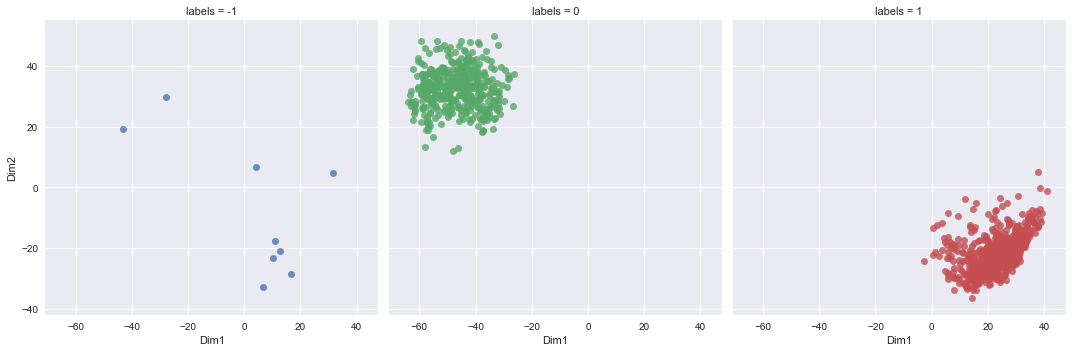

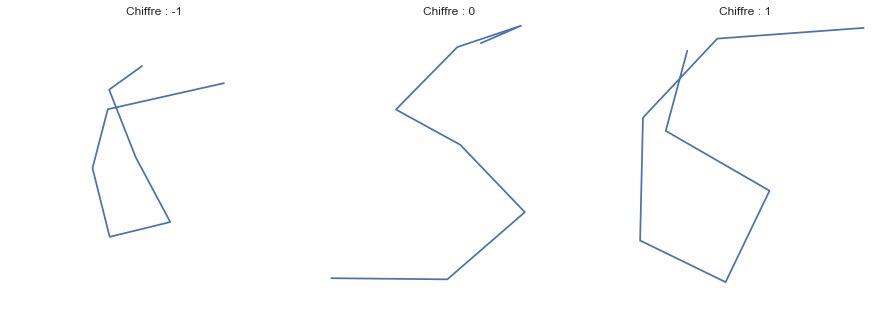

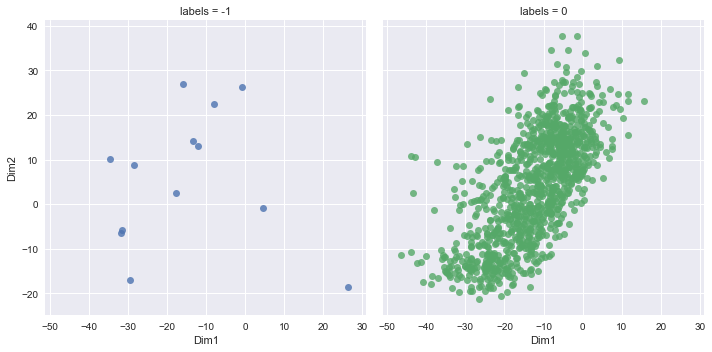

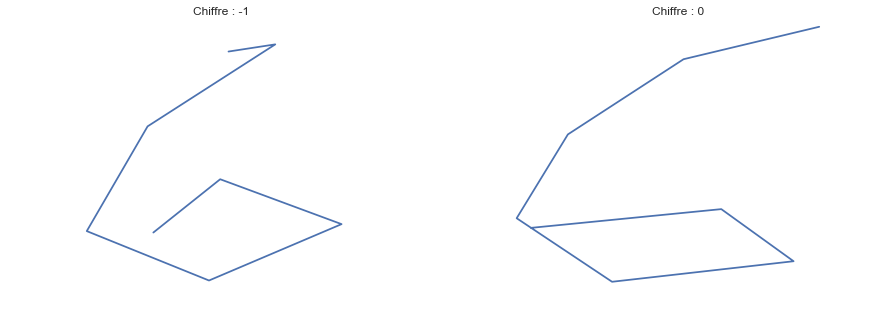

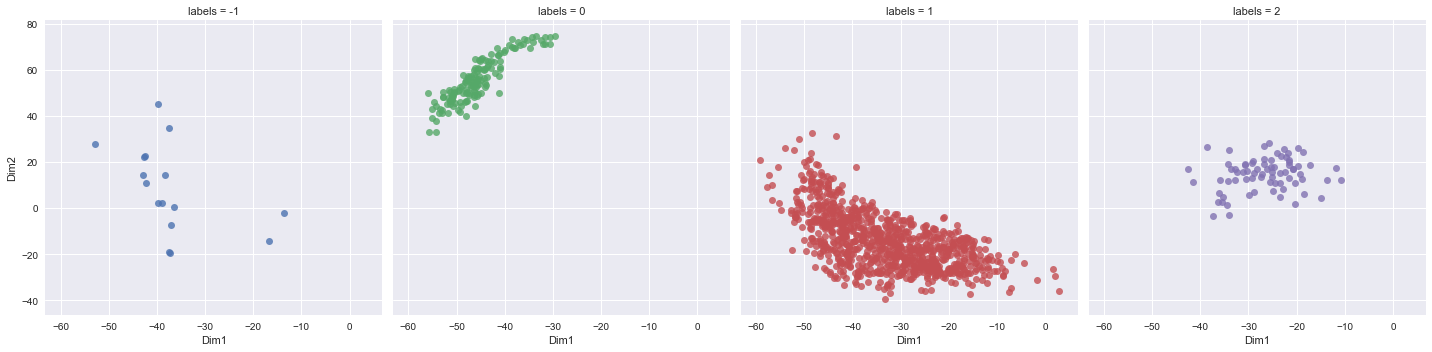

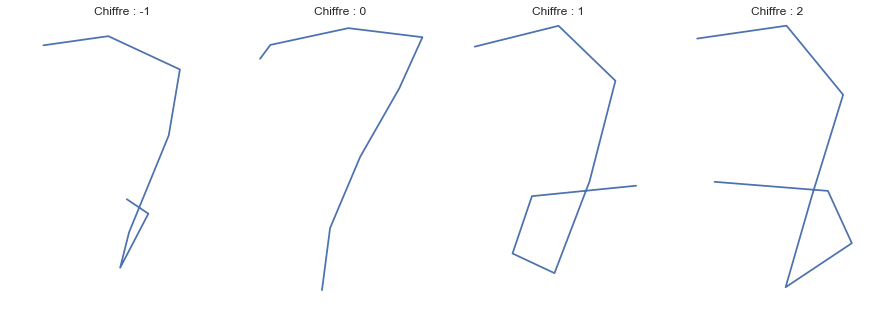

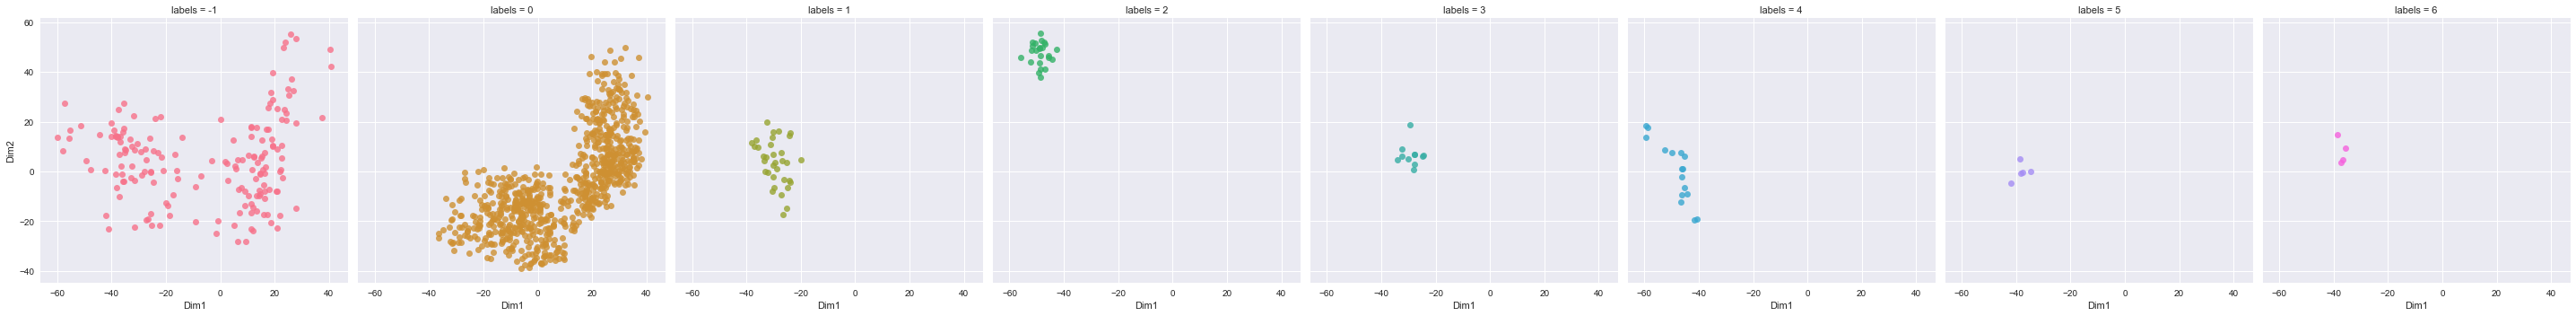

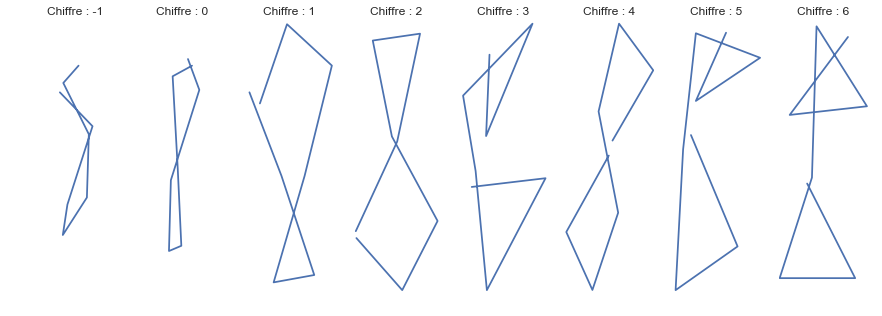

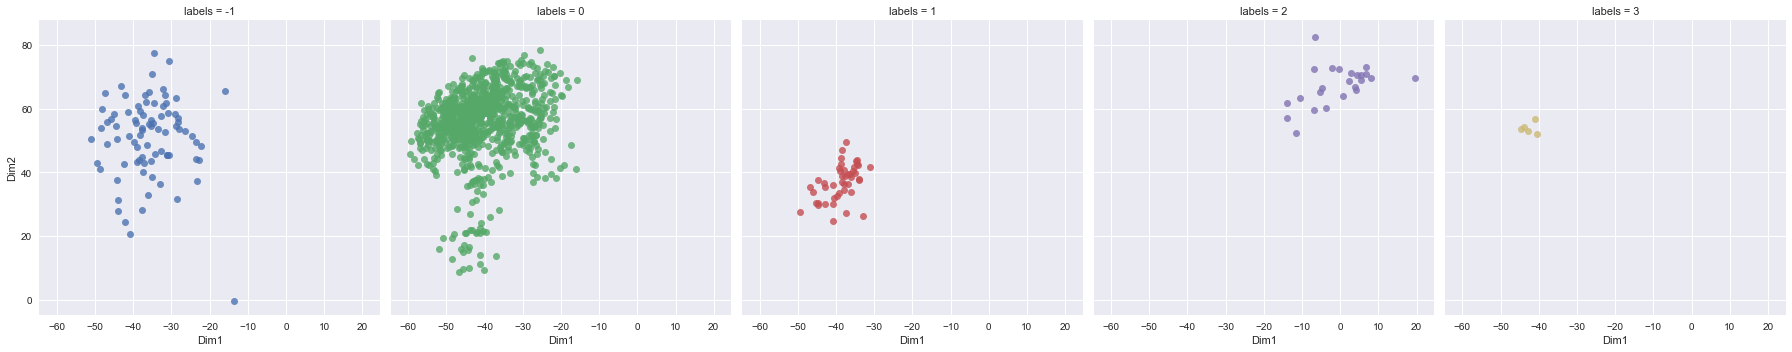

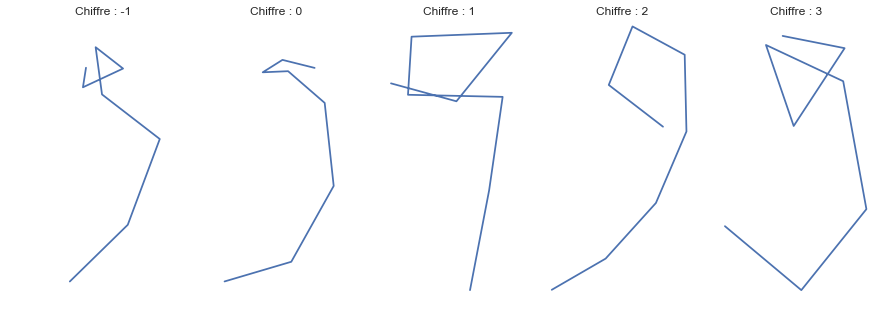

In [218]:
for c in range(10):
    temp = pca_ch[c].assign(labels = pen_ch_db[c].labels_)
    seaborn.lmplot("Dim1", "Dim2", hue = "labels", col = "labels", data = temp, fit_reg = False)
    temp2 = pen_ch[c].assign(labels = pen_ch_db[c].labels_)
    temp3 = temp2.groupby("labels").mean()
    fig = plt.figure(figsize = (15, 5))
    for i, l in enumerate(temp3.index):
        ax = fig.add_subplot(1, len(temp3.index), i + 1)
        dessin(ax, temp3.loc[l, xN], temp3.loc[l, yN], l)
    plt.show()
    